## Imports and directory

In [ ]:
!pip install wandb

import wandb
wandb.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 27.5 MB/s 
     |████████████████████████████████| 181 kB 71.2 MB/s 
     |████████████████████████████████| 158 kB 66.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 157 kB 71.7 MB/s 
     |████████████████████████████████| 157 kB 69.9 MB/s 
     |████████████████████████████████| 157 kB 79.8 MB/s 
     |████████████████████████████████| 157 kB 72.2 MB/s 
     |████████████████████████████████| 157 kB 70.0 MB/s 
     |████████████████████████████████| 157 kB 69.0 MB/s 
     |████████████████████████████████| 157 kB 75.6 MB/s 
     |████████████████████████████████| 156 kB 60.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=e1c9d1aac878e927fab0b8124c5fbb4c5b8212f97ca82194990e52c595ee798d
  Stored in directory: /root/.cache/pip/wheels/3e/31

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from fastai.callback.wandb import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 28.9 MB/s 


In [ ]:
%env WANDB_PROJECT=[img2img]_sketch_to_art
%env WANDB_LOG_MODEL=true

env: WANDB_PROJECT=[img2img]_sketch_to_art
env: WANDB_LOG_MODEL=true


In [ ]:
!nvidia-smi

Mon Sep 19 04:28:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! [ -e /content ] && pip install -Uqq fastai

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision.all import *
from torchvision.models import vgg19_bn

import random
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloads and Path

In [ ]:
!pwd

/content


In [ ]:
# !wget https://physiologie.unibe.ch/supplementals/delaunay.zip [Dont use this, dataset edited manually]
!cp drive/MyDrive/Datasets/DELAUNAY/data.zip ./data.zip 

In [ ]:
!unzip data.zip

In [ ]:
!mkdir ./DELAUNAY
!mv ./data/* ./DELAUNAY/art

mkdir: cannot create directory ‘./DELAUNAY’: File exists


In [ ]:
path = Path('./DELAUNAY')
path.ls()

(#2) [Path('DELAUNAY/art'),Path('DELAUNAY/sketches')]

In [ ]:
!mkdir ./DELAUNAY/sketches
path_Y = path/'art'
path_X = path/'sketches'

mkdir: cannot create directory ‘./DELAUNAY/sketches’: File exists


In [ ]:
path.ls()

(#2) [Path('DELAUNAY/art'),Path('DELAUNAY/sketches')]

## Data (Sketch Generation)

In [ ]:
images = get_image_files(path/"art")

In [ ]:
images.items[:5]

[Path('DELAUNAY/art/L†szl¢ Moholy-Nagy_144.jpg'),
 Path('DELAUNAY/art/Yves Klein_71.jpg'),
 Path('DELAUNAY/art/Leon Polk Smith_171.jpg'),
 Path('DELAUNAY/art/Antoine Pevsner_198.jpg'),
 Path('DELAUNAY/art/Jean Arp_133.jpg')]

In [ ]:
!ls ./DELAUNAY/art/data/

Testing Crappification on single image

True

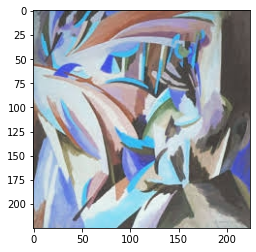

In [ ]:
import PIL
import cv2

img=cv2.imread(f'{path_Y}/Alberto Magnelli_132.jpg')
plt.imshow(img)
cv2.imwrite('img.png', img)

True

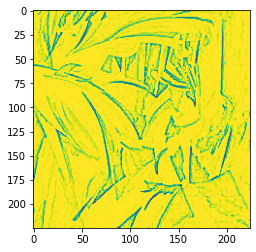

In [ ]:
k_size=7

grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to Grey Image
invert_img=cv2.bitwise_not(grey_img)            # Invert Image
blur_img=cv2.GaussianBlur(invert_img, (k_size,k_size),0) # Blur image
invblur_img=cv2.bitwise_not(blur_img)           # Invert Blurred Image
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)  # Sketch Image

plt.imshow(sketch_img)
cv2.imwrite('sketch.png', sketch_img)

Crappification Logic

In [ ]:
def generate_sketch(filename):
    dest = path_X / filename.relative_to(path_Y)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = cv2.imread(str(filename))

    k_size = 7

    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to Grey Image
    invert_img = cv2.bitwise_not(grey_img)            # Invert Image
    blur_img = cv2.GaussianBlur(invert_img, (k_size,k_size),0) # Blur image
    invblur_img = cv2.bitwise_not(blur_img)           # Invert Blurred Image
    sketch_img = cv2.divide(grey_img,invblur_img, scale=256.0)  # Sketch Image


    cv2.imwrite(str(dest), sketch_img)

In [ ]:
parallel(generate_sketch, images.items)

(#11503) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
!cp -r ./DELAUNAY/* drive/MyDrive/Datasets/DELAUNAY/sketch2art/

## Datasets

In [ ]:
# !cp -r ./DELAUNAY/* drive/MyDrive/Datasets/DELAUNAY/sketch2art/
!mkdir ./DELAUNAY
!cp drive/MyDrive/Datasets/DELAUNAY/sketch2art/* -r ./DELAUNAY 

path = Path('./DELAUNAY')
path_Y = path/'art'
path_X = path/'sketches'
path.ls()

(#2) [Path('DELAUNAY/sketches'),Path('DELAUNAY/art')]

X ra Y ko filename haru eutai hunxa,
X ko filename liyera Y bata nikalne

In [ ]:
cv_items = get_image_files(path/'sketches')
cv_splitter = RandomSplitter(seed=42)
cv_split = cv_splitter(cv_items)
cv_label = lambda x: path_Y/x.name

In [ ]:
class ImageResizer(Transform):
    order=1
    "Resize image to `size` using `resample`"
    def __init__(self, size, resample=BILINEAR):
        if not is_listy(size): size=(size,size)
        self.size,self.resample = (size[1],size[0]),resample

    def encodes(self, o:PILImage): return o.resize(size=self.size, resample=self.resample)
    def encodes(self, o:PILMask):  return o.resize(size=self.size, resample=NEAREST)

tfms : transformations

In [ ]:
tfms = [[PILImage.create], [cv_label, PILImage.create]]
cv_dsets = Datasets(cv_items, tfms, splits=cv_split)
dls = cv_dsets.dataloaders(bs=8, 
                           after_item=[ImageResizer(256), ToTensor(), IntToFloatTensor()], # RandomResizedCrop(224, min_scale=0.3) 
                           after_batch=aug_transforms(do_flip=True, flip_vert=False, size=256) 
                           )

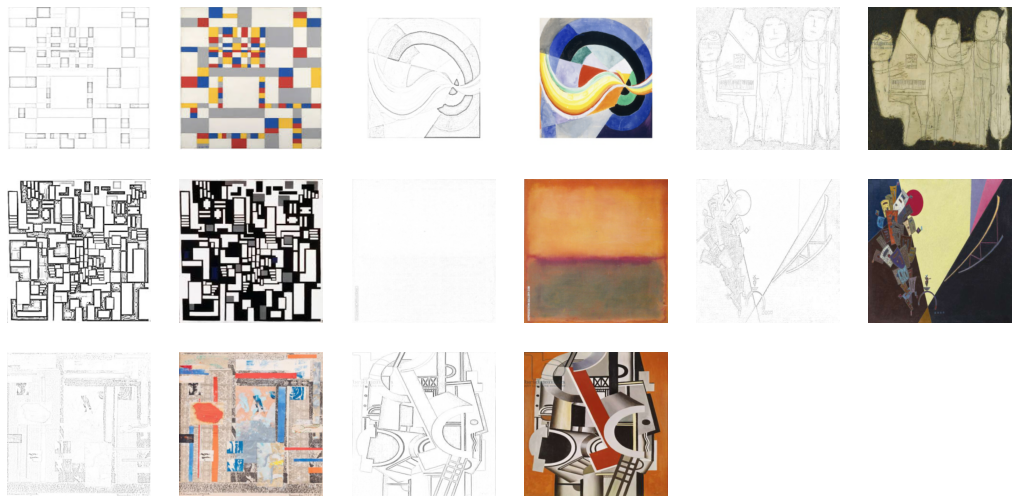

In [ ]:
dls.valid.show_batch(max_n=9, nrows=3)

## Model

In [ ]:
type(dls.valid_ds[0][1])

fastai.vision.core.PILImage

In [ ]:
# t = dls.valid_ds[0][1].data
# t = torch.stack([t,t])

In [ ]:
def gram_matrix(x):
    n,c,h,w = x.size()
    x = x.view(n, c, -1)
    return (x @ x.transpose(1,2))/(c*h*w)

In [ ]:
# gram_matrix(t)

In [ ]:
base_loss = F.mse_loss

In [ ]:
vgg_m = vgg19_bn(True).features.cuda().eval()
requires_grad(vgg_m)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

True

In [ ]:
def children(m:nn.Module):
    "Get children of `m`."
    return list(m.children())

In [ ]:
blocks = [i-1 for i,o in enumerate(children(vgg_m)) if isinstance(o,nn.MaxPool2d)]
blocks, [vgg_m[i] for i in blocks]

([5, 12, 25, 38, 51],
 [ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True)])

In [ ]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

In [ ]:
feat_loss = FeatureLoss(vgg_m, blocks[2:5], [5,15,2])

## Train

In [ ]:
wd = 1e-3
learn = unet_learner(dls, models.resnet34, wd=wd, loss_func=feat_loss, # 'convnext_tiny_in22k' not working: 'str' object is not callable
                     blur=True, norm_type=NormType.Spectral, 
                     cbs=WandbCallback(), self_attention=True, 
                     y_range=(-3, 3), n_out=3).to_fp16()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.summary()

DynamicUnet (Input shape: 8 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 64 x 128 x 128  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     8 x 64 x 64 x 64    
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
learn

SuggestedLRs(valley=0.019054606556892395)

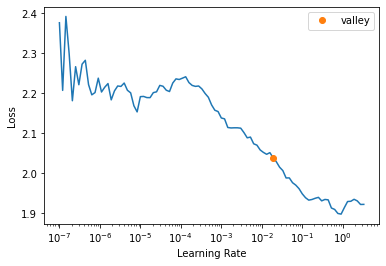

In [ ]:
learn.lr_find()

In [ ]:
lr = 1e-2

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,time
0,1.327642,1.201939,10:39
1,1.262641,1.245481,10:42
2,1.246132,1.190424,10:44
3,1.145064,1.165944,10:46
4,1.123938,1.047092,10:42
5,1.121675,1.024030,10:45
6,1.134199,0.970620,10:44
7,1.123437,1.003591,10:42
8,1.060952,1.053725,10:39
9,0.945664,0.909871,10:40


In [ ]:
learn.save('1a')

Path('models/1a.pth')

In [ ]:
!mkdir ./models
# !cp models/1a.pth drive/MyDrive/Colab\ Notebooks/models/sketch2img_1a.pth
!cp drive/MyDrive/Colab\ Notebooks/models/sketch2img_1a.pth models/1a.pth

In [ ]:
learn.load('1a')

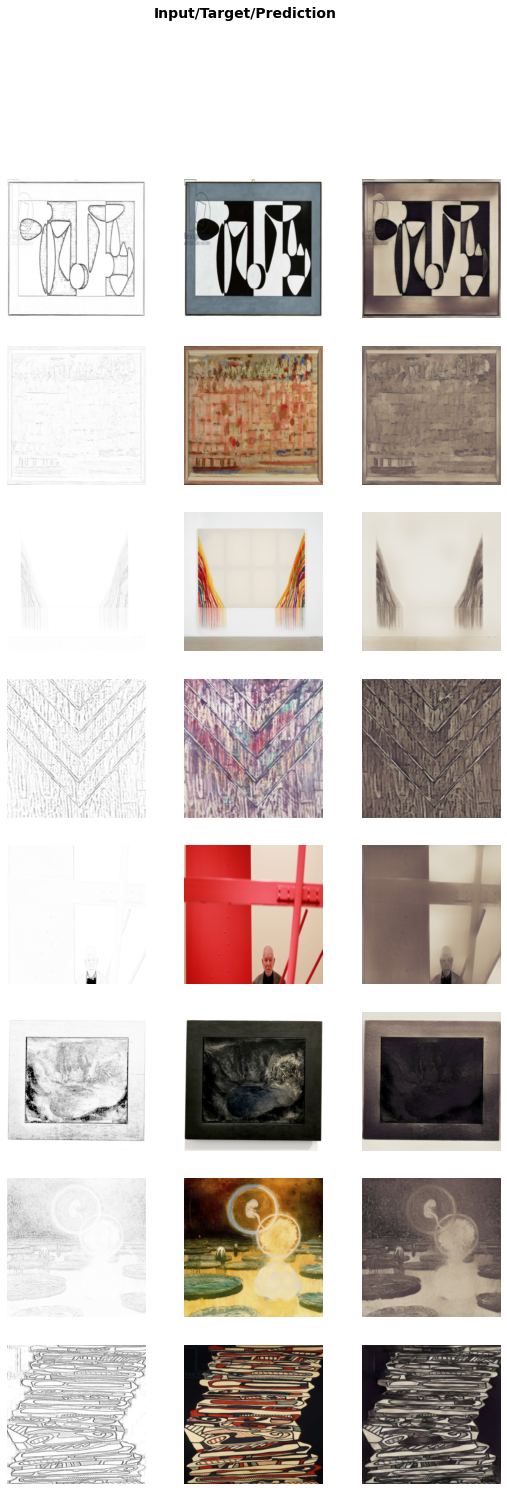

In [ ]:
learn.show_results()

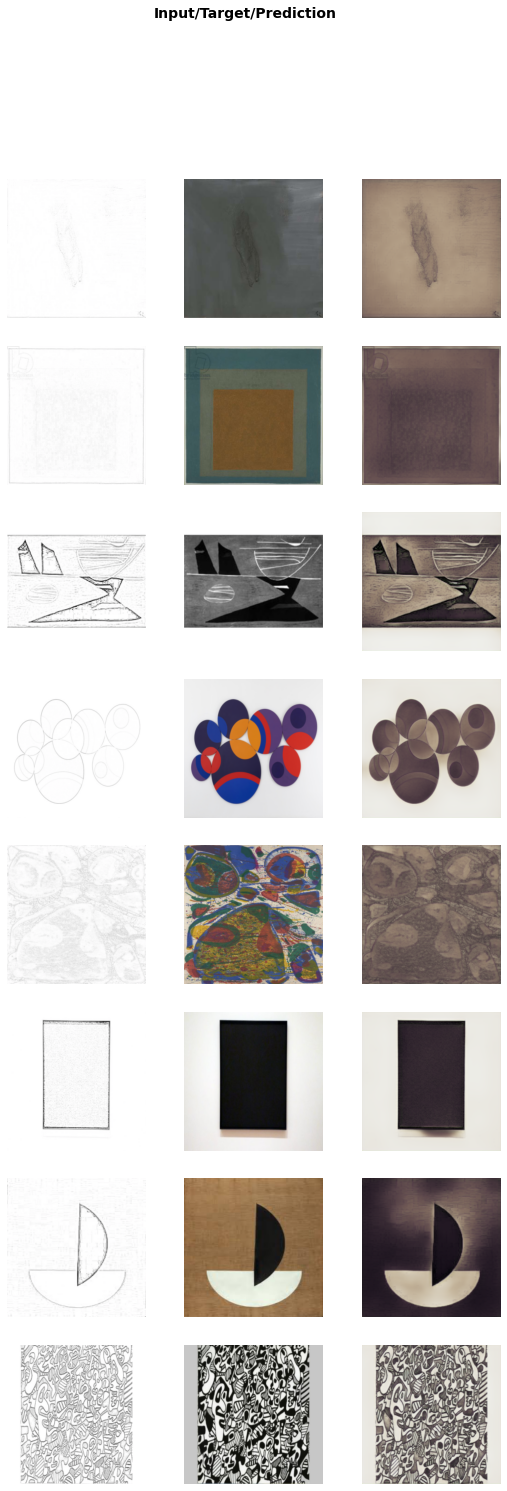

In [ ]:
learn.show_results()

In [ ]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_2,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇███████▆▄▁
lr_1,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇███████▆▄▁
lr_2,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇███████▆▄▁
mom_0,██████▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▃▅█
mom_1,██████▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▃▅█
mom_2,██████▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▃▅█
raw_loss,▇▆▅▃▄▆▄▅▄▃▃▄▃▆▄▄▃▅▃▄▅▄▃▂█▄▅▄▃▅▂▂▆▄▄▁▃▃▃▂


## Export Learner

In [ ]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 141.6 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import dill

learn = learn.to_fp32()
learn.freeze()
learn.export('sketch2img_1a.pkl', pickle_module=dill)

In [ ]:
learn.summary()

ValueError: This DataLoader does not contain any batches

In [ ]:
!cp sketch2img_1a.pkl drive/MyDrive/Colab\ Notebooks/models/sketch2img_1a.pkl
#!cp drive/MyDrive/Colab\ Notebooks/models/sketch2img_1a.pkl ./sketch2img_1a.pkl

In [ ]:
ls drive/MyDrive/Colab\ Notebooks/models/

encoder_lm_commonlit.pth                 NLP-HF-datarush-roberta-large-2.pth
encoder_lm_datarush.pth                  NLP-HF-datarush-roberta-large-3.pkl
final-NLP-commonlit-Fastai2.pkl          NLP-HF-datarush-roberta-large-3.pth
final-NLP-commonlit-Fastai2.pth          NLP-HF-datarush-roberta-large-4.pkl
final-NLP-datarush-Fastai2.pkl           NLP-HF-datarush-roberta-large-4.pth
final-NLP-datarush-Fastai2.pth           NLP-HF-datarush-roberta-large.pkl
learn_lm_commonlit.pkl                   NLP-HF-datarush-roberta-large.pth
learn_lm_datarush.pkl                    NLP-HF-datarush-roberta.pkl
NLP-commonlit-Fastai2-transformers.pkl   NLP-HF-datarush-roberta.pth
NLP-commonlit-Fastai2-transformers.pth   NLP-HF-datarush-roberta-unfreeze-1.pth
NLP-HF-datarush-PubMedBERT.pth           sketch2img_1a.pkl
NLP-HF-datarush-roberta-day1-epoch5.pth  sketch2img_1a.pth
NLP-HF-datarush-roberta-large-2.pkl


## Inference time

In [ ]:
learn = load_learner(fname = './models/sketch2img_1a.pkl', pickle_module=dill)
preds = learn.predict('./image.jpg')

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


from fastai.vision.all import *
import dill

class ImageResizer(Transform):
    order=1
    "Resize image to `size` using `resample`"
    def __init__(self, size, resample=BILINEAR):
        if not is_listy(size): size=(size,size)
        self.size,self.resample = (size[1],size[0]),resample

    def encodes(self, o:PILImage): return o.resize(size=self.size, resample=self.resample)
    def encodes(self, o:PILMask):  return o.resize(size=self.size, resample=NEAREST)
    
learn = load_learner(fname = './models/sketch2img_1a.pkl', pickle_module=dill)
preds = learn.predict('./image.jpg')

In [ ]:
preds[0]

TensorImage([[[ 63,  80,  77,  ...,  71,  66,  62],
              [ 64, 134, 162,  ..., 159, 152, 108],
              [ 60, 145, 184,  ..., 181, 167, 111],
              ...,
              [ 56, 132, 169,  ..., 157, 150, 100],
              [ 59, 118, 143,  ..., 137, 132,  95],
              [ 57,  66,  66,  ...,  56,  56,  55]],

             [[ 54,  71,  65,  ...,  61,  60,  57],
              [ 58, 125, 150,  ..., 146, 142, 101],
              [ 56, 136, 174,  ..., 170, 163, 108],
              ...,
              [ 50, 123, 160,  ..., 147, 142,  92],
              [ 56, 113, 134,  ..., 135, 129,  95],
              [ 52,  60,  66,  ...,  57,  54,  54]],

             [[ 61,  74,  66,  ...,  60,  60,  61],
              [ 62, 122, 142,  ..., 137, 138,  99],
              [ 57, 129, 159,  ..., 150, 151, 100],
              ...,
              [ 52, 116, 146,  ..., 128, 134,  88],
              [ 53, 104, 123,  ..., 118, 121,  85],
              [ 52,  58,  57,  ...,  48,  51,  54]]])

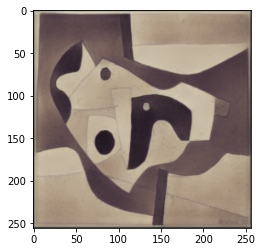

In [ ]:
plt.imshow(preds[0].permute(1, 2, 0))